In [196]:
import numpy as np

In [197]:
import pandas as pd
import pymongo
import pandas as pd
from pymongo import MongoClient
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

In [257]:
# HA = pd.read_csv(r"HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity.csv")

#establishing the connection
conn = psycopg2.connect(
   database="dap_new", user='postgres', password='rajat@123', host='127.0.0.1', port= '5432'
)
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()
cursor.execute("SELECT * FROM public.hiv_aids;") #Execute the query;

In [258]:
print(cursor)

<cursor object at 0x0000028187A41AC0; closed: 0>


In [259]:
# cursor.fetchall()
column_names=['id','YEAR', 'Neighborhood (U.H.F)', 'SEX', 'RACE/ETHNICITY',
       'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
       'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
       'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
       'TOTAL NUMBER OF AIDS DIAGNOSES',
       'AIDS DIAGNOSES PER 100,000 POPULATION','Borough']

In [260]:
HA=pd.DataFrame(cursor.fetchall(),columns=column_names)

In [261]:
HA

,id,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",borough
0,639e70a1617d70d2c3c7757b,2010,Greenpoint ...,Male,Black ...,6,330.4,0,0,5,275.3,nan
1,639e70a1617d70d2c3c7757c,2011,Stapleton - St. George ...,Female,Native American ...,0,0,0,0,0,0,nan
2,639e70a1617d70d2c3c7757d,2010,Southeast Queens ...,Male,All ...,23,25.4,5,21.7,14,15.4,nan
3,639e70a1617d70d2c3c7757e,2012,Upper Westside ...,Female,Unknown ...,0,0,0,0,0,0,nan
4,639e70a1617d70d2c3c7757f,2013,Willowbrook ...,Male,Unknown ...,0,0,0,0,0,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
21739,63a0fc79617d70d2c3c7ca68,2020,Willowbrook ...,Male,Asian/Pacific\nIslander ...,0,0,0,NA,0,0,Staten\nIsland
21740,63a0fc79617d70d2c3c7ca69,2020,Willowbrook ...,Male,Black ...,2,177,0,0,1,88.5,Staten\nIsland
21741,63a0fc79617d70d2c3c7ca6a,2020,Willowbrook ...,Male,Latino/Hispanic ...,0,0,0,NA,0,0,Staten\nIsland
21742,63a0fc79617d70d2c3c7ca6b,2020,Willowbrook ...,Male,Other/Unknown ...,0,0,0,NA,0,0,Staten\nIsland


In [262]:
HA.describe()

,id,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",borough
count,21744,21744,21744,21744,21744,21744,21744,21744,21744,21744,21744,21744
unique,21744,9,66,3,11,274,1206,110,303,220,938,8
top,639e70a1617d70d2c3c7757b,2016,All ...,Male,All ...,0,0,0,0,0,0,nan
freq,1,2592,1632,8448,3720,7815,7761,12312,8418,9276,9213,14496


In [263]:
len(HA)

21744

In [264]:
len(HA.columns)

12

In [266]:
HA.columns

Index(['YEAR', 'Borough', 'Neighborhood (U.H.F)', 'SEX', 'RACE/ETHNICITY',
       'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
       'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
       'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
       'TOTAL NUMBER OF AIDS DIAGNOSES',
       'AIDS DIAGNOSES PER 100,000 POPULATION'],
      dtype='object')

In [267]:
HA.isnull().sum()

YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             3
HIV DIAGNOSES PER 100,000 POPULATION                                     71
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             1
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1337
TOTAL NUMBER OF AIDS DIAGNOSES                                            1
AIDS DIAGNOSES PER 100,000 POPULATION                                    69
dtype: int64

In [268]:
HA.head(1)

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3


In [269]:
# HA= HA.dropna()
HA.rename(columns = {'test':'TEST', 'odi':'ODI',
                              't20':'T20'}, inplace = True)

In [271]:
mode_value=HA['Borough'].mode()
print(mode_value)
HA['Borough'].fillna(value=mode_value, inplace=True)

0    Brooklyn
Name: Borough, dtype: object


In [273]:
HA['Borough'].unique()

array(['Brooklyn', nan, 'All', 'Bronx', 'Manhattan', 'Queens',
       'Staten\nIsland'], dtype=object)

In [274]:
HA.isna().sum()

YEAR                                                                      0
Borough                                                                2927
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             3
HIV DIAGNOSES PER 100,000 POPULATION                                     71
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             1
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1337
TOTAL NUMBER OF AIDS DIAGNOSES                                            1
AIDS DIAGNOSES PER 100,000 POPULATION                                    69
dtype: int64

In [275]:
HA['TOTAL NUMBER OF HIV DIAGNOSES'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7248 entries, 0 to 7247
Series name: TOTAL NUMBER OF HIV DIAGNOSES
Non-Null Count  Dtype 
--------------  ----- 
7245 non-null   object
dtypes: object(1)
memory usage: 56.8+ KB


In [276]:
HA['TOTAL NUMBER OF HIV DIAGNOSES'].unique()

array(['6', '0', '23', '54', '14', '7', '5', '3', '4', '1', '59', '45',
       '17', '2', '25', '64', '34', '82', '11', '135', '44', '29', '49',
       '24', '38', '9', '55', '19', '13', '26', '8', '52', '91', '21',
       '28', '20', '109', '108', '99', '27', '65', '10', '16', '18',
       '2832', '56', '32', '15', '22', '63', '39', '41', '51', '35',
       '125', '74', '113', '75', '62', '68', '171', '36', '60', '37',
       '87', '84', '72', '155', '12', '85', '46', '148', '66', '33', '*',
       '116', '100', '30', '95', '2990', '40', '187', '53', '71', '58',
       '204', '81', '134', '142', '178', '47', '98', '31', '78', '90',
       '79', '69', '86', '172', '271', '89', '140', '143', '138', '104',
       '80', '92', '67', '150', '94', '117', '314', '145', '57', '88',
       '76', '115', '122', '83', '114', '112', '43', '102', '129', '42',
       '107', '110', '105', '3225', '48', '50', '96', '141', '212', '77',
       '61', '275', '168', '151', '166', '111', '325', '284', '252',

In [277]:
# HA['TOTAL NUMBER OF HIV DIAGNOSES'] =HA['TOTAL NUMBER OF HIV DIAGNOSES'].str.replace(nan,np.nan)
HA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   YEAR                                                                 7248 non-null   int64 
 1   Borough                                                              4321 non-null   object
 2   Neighborhood (U.H.F)                                                 7248 non-null   object
 3   SEX                                                                  7248 non-null   object
 4   RACE/ETHNICITY                                                       7248 non-null   object
 5   TOTAL NUMBER OF HIV DIAGNOSES                                        7245 non-null   object
 6   HIV DIAGNOSES PER 100,000 POPULATION                                 7177 non-null   object
 7   TOTAL NUMBER OF

In [278]:
HA= HA.dropna()

In [279]:
HA

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Brooklyn,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
...,...,...,...,...,...,...,...,...,...,...,...
7232,2020,Staten\nIsland,Willowbrook,All,Black,2,79.9,0,0,1,39.9
7236,2020,Staten\nIsland,Willowbrook,Female,All,1,2.5,0,0,0,0
7237,2020,Staten\nIsland,Willowbrook,Female,Asian/Pacific\nIslander,1,12.4,0,0,0,0
7242,2020,Staten\nIsland,Willowbrook,Male,All,2,5.4,0,0,1,2.7


In [281]:
HA["Borough"].unique()

array(['Brooklyn', 'All', 'Bronx', 'Manhattan', 'Queens',
       'Staten\nIsland'], dtype=object)

In [282]:
HA['TOTAL NUMBER OF HIV DIAGNOSES'].unique()

array(['6', '2235', '145', '933', '792', '27', '338', '453', '15', '267',
       '143', '2', '26', '1782', '130', '666', '649', '25', '312', '489',
       '8', '234', '231', '3', '13', '137', '76', '59', '352', '158',
       '172', '11', '87', '36', '48', '10', '14', '61', '34', '1', '104',
       '51', '49', '24', '12', '68', '37', '94', '43', '17', '69', '32',
       '35', '41', '9', '57', '22', '4', '5', '39', '33', '74', '31',
       '21', '53', '23', '566', '348', '106', '7', '72', '146', '113',
       '420', '28', '235', '85', '66', '170', '128', '136', '97', '19',
       '18', '88', '56', '45', '16', '46', '29', '63', '423', '117',
       '155', '120', '20', '377', '134', '115', '81', '73', '79', '44',
       '399', '67', '190', '166', '42', '38', '54', '50', '40', '132',
       '93', '122', '78', '2073', '873', '755', '299', '370', '1703',
       '110', '638', '661', '272', '447', '208', '218', '75', '334',
       '133', '182', '83', '30', '62', '60', '605', '327', '151', '127'

In [283]:
HA.columns

Index(['YEAR', 'Borough', 'Neighborhood (U.H.F)', 'SEX', 'RACE/ETHNICITY',
       'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
       'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
       'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
       'TOTAL NUMBER OF AIDS DIAGNOSES',
       'AIDS DIAGNOSES PER 100,000 POPULATION'],
      dtype='object')

In [284]:
# HA['TOTAL NUMBER OF HIV DIAGNOSES'].unique()

In [285]:
HA= HA.dropna()

In [286]:
HA['TOTAL NUMBER OF HIV DIAGNOSES']=HA['TOTAL NUMBER OF HIV DIAGNOSES'].astype(float).astype(int)

In [287]:
mean_value=HA['TOTAL NUMBER OF HIV DIAGNOSES'].astype(int).mode()
print(mean_value)
HA[['TOTAL NUMBER OF HIV DIAGNOSES']].fillna(value=mean_value, inplace=True)

0    1
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: int32


In [20]:
HA.isnull().sum()

YEAR                                                                   0
Borough                                                                0
Neighborhood (U.H.F)                                                   0
SEX                                                                    0
RACE/ETHNICITY                                                         0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
dtype: int64

In [21]:
mean_value1=HA[['HIV DIAGNOSES PER 100,000 POPULATION']].mean()
HA['HIV DIAGNOSES PER 100,000 POPULATION'].fillna(value=mean_value1, inplace=True)

<ipython-input-21-16c6d4db25fd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value1=HA[['HIV DIAGNOSES PER 100,000 POPULATION']].mean()


In [22]:
mean_value2=HA[['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES']].mean()
HA['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].fillna(value=mean_value2, inplace=True)

<ipython-input-22-6c4715932502>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HA['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].fillna(value=mean_value2, inplace=True)


In [23]:
mean_value3=HA[['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES']].mean()
HA['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'].fillna(value=mean_value3, inplace=True)

<ipython-input-23-4aface687a01>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value3=HA[['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES']].mean()


In [24]:
mean_value4=HA[['AIDS DIAGNOSES PER 100,000 POPULATION']].mean()
HA['AIDS DIAGNOSES PER 100,000 POPULATION'].fillna(value=mean_value4, inplace=True)

<ipython-input-24-d5ed3ebe2faf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value4=HA[['AIDS DIAGNOSES PER 100,000 POPULATION']].mean()


In [25]:
HA.isnull().sum()

YEAR                                                                   0
Borough                                                                0
Neighborhood (U.H.F)                                                   0
SEX                                                                    0
RACE/ETHNICITY                                                         0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
dtype: int64

In [26]:
HA['SEX'].value_counts()

All       1170
Male      1140
Female     740
Name: SEX, dtype: int64

In [27]:
HA_update=HA[HA["SEX"]!='All']
HA_update.shape

(1880, 11)

In [28]:
HA_update["Neighborhood (U.H.F)"].unique()

array(['Greenpoint', 'All', 'Crotona - Tremont', 'Fordham - Bronx\nPark',
       'High Bridge -\nMorrisania', 'Hunts Point - Mott\nHaven',
       'Kingsbridge -\nRiverdale', 'Northeast Bronx',
       'Pelham - Throgs\nNeck', 'Bedford Stuyvesant -\nCrown Heights',
       'Bensonhurst - Bay\nRidge', 'Borough Park', 'Canarsie - Flatlands',
       'Coney Island -\nSheepshead Bay',
       'Downtown - Heights -\nPark Slope', 'East Flatbush -\nFlatbush',
       'East New York', 'Sunset Park', 'Williamsburg -\nBushwick',
       'Central Harlem -\nMorningside Heights', 'Chelsea - Clinton',
       'East Harlem', 'Gramercy Park -\nMurray Hill',
       'Greenwich Village -\nSoho', 'Lower Manhattan',
       'Union Square -\nLower East Side', 'Upper East Side',
       'Upper West Side', 'Washington Heights -\nInwood',
       'Bayside - Little Neck', 'Flushing - Clearview', 'Fresh Meadows',
       'Jamaica', 'Long Island City -\nAstoria',
       'Ridgewood - Forest\nHills', 'Rockaway', 'Southeast Que

In [37]:
lst1=[]
lst2=[]
for i in HA_new["Neighborhood (U.H.F)"].unique():
    df=pd.DataFrame()
    df=HA_new[HA_new["Neighborhood (U.H.F)"]==i]
    print(df.shape)
    lst1.append(i)
    lst2.append(df["HIV DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())

(23, 11)
(29, 11)
(29, 11)
(28, 11)
(25, 11)
(20, 11)
(24, 11)
(32, 11)
(36, 11)
(24, 11)
(27, 11)
(26, 11)
(34, 11)
(35, 11)
(33, 11)
(32, 11)
(30, 11)
(33, 11)
(36, 11)
(33, 11)
(32, 11)
(23, 11)
(26, 11)
(20, 11)
(30, 11)
(23, 11)
(29, 11)
(33, 11)
(8, 11)
(27, 11)
(20, 11)
(35, 11)
(34, 11)
(31, 11)
(24, 11)
(27, 11)
(34, 11)
(37, 11)
(22, 11)
(19, 11)
(23, 11)
(14, 11)


In [38]:
# lst2

In [39]:
max_hiv_df=pd.DataFrame()
max_hiv_df["county"]=lst1
max_hiv_df["AVG HIV DIAGNOSES PER 100,000 POPULATION"]=lst2

In [40]:
max_hiv_df=max_hiv_df.sort_values(by="AVG HIV DIAGNOSES PER 100,000 POPULATION",ascending=False)
max_hiv_df

,county,"AVG HIV DIAGNOSES PER 100,000 POPULATION"
22,Greenwich Village -\nSoho,117.461538
19,Chelsea - Clinton,93.909091
23,Lower Manhattan,85.570000
1,Crotona - Tremont,74.424138
4,Hunts Point - Mott\nHaven,73.760000
41,Willowbrook,73.442857
3,High Bridge -\nMorrisania,70.675000
20,East Harlem,65.456250
15,East New York,61.646875
8,Bedford Stuyvesant -\nCrown Heights,57.569444


In [41]:
max_hiv_df["county"].unique()

array(['Greenwich Village -\nSoho', 'Chelsea - Clinton',
       'Lower Manhattan', 'Crotona - Tremont',
       'Hunts Point - Mott\nHaven', 'Willowbrook',
       'High Bridge -\nMorrisania', 'East Harlem', 'East New York',
       'Bedford Stuyvesant -\nCrown Heights',
       'Washington Heights -\nInwood', 'Greenpoint',
       'South Beach -\nTottenville', 'Sunset Park',
       'Gramercy Park -\nMurray Hill',
       'Central Harlem -\nMorningside Heights',
       'Williamsburg -\nBushwick', 'Fordham - Bronx\nPark',
       'Ridgewood - Forest\nHills', 'Long Island City -\nAstoria',
       'East Flatbush -\nFlatbush', 'Union Square -\nLower East Side',
       'Upper East Side', 'Upper West Side', 'Port Richmond',
       'Pelham - Throgs\nNeck', 'Stapleton - St.\nGeorge',
       'Kingsbridge -\nRiverdale', 'Flushing - Clearview',
       'Bensonhurst - Bay\nRidge', 'Canarsie - Flatlands',
       'Downtown - Heights -\nPark Slope', 'Northeast Bronx', 'Rockaway',
       'Fresh Meadows', 'Bay

In [42]:
max_hiv_df[:10]

,county,"AVG HIV DIAGNOSES PER 100,000 POPULATION"
22,Greenwich Village -\nSoho,117.461538
19,Chelsea - Clinton,93.909091
23,Lower Manhattan,85.570000
1,Crotona - Tremont,74.424138
4,Hunts Point - Mott\nHaven,73.760000
41,Willowbrook,73.442857
3,High Bridge -\nMorrisania,70.675000
20,East Harlem,65.456250
15,East New York,61.646875
8,Bedford Stuyvesant -\nCrown Heights,57.569444


In [43]:
import matplotlib as plt
import seaborn as sns

<ipython-input-44-8d71efa6deac>:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(max_hiv_df["county"][:10], max_hiv_df['AVG HIV DIAGNOSES PER 100,000 POPULATION'][:10], color ='maroon',


<BarContainer object of 10 artists>

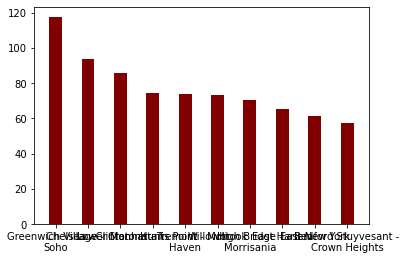

In [44]:
# creating the bar plot
import matplotlib.pyplot as plt
plt.bar(max_hiv_df["county"][:10], max_hiv_df['AVG HIV DIAGNOSES PER 100,000 POPULATION'][:10], color ='maroon',
        width = 0.4,)

<ipython-input-46-72bc6db73fd4>:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(max_hiv_df["county"][:10], max_hiv_df['AVG HIV DIAGNOSES PER 100,000 POPULATION'][:10], color ='maroon',
<ipython-input-46-72bc6db73fd4>:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.xticks(max_hiv_df["county"][:10], max_hiv_df["county"][:10].unique(), rotation=45)


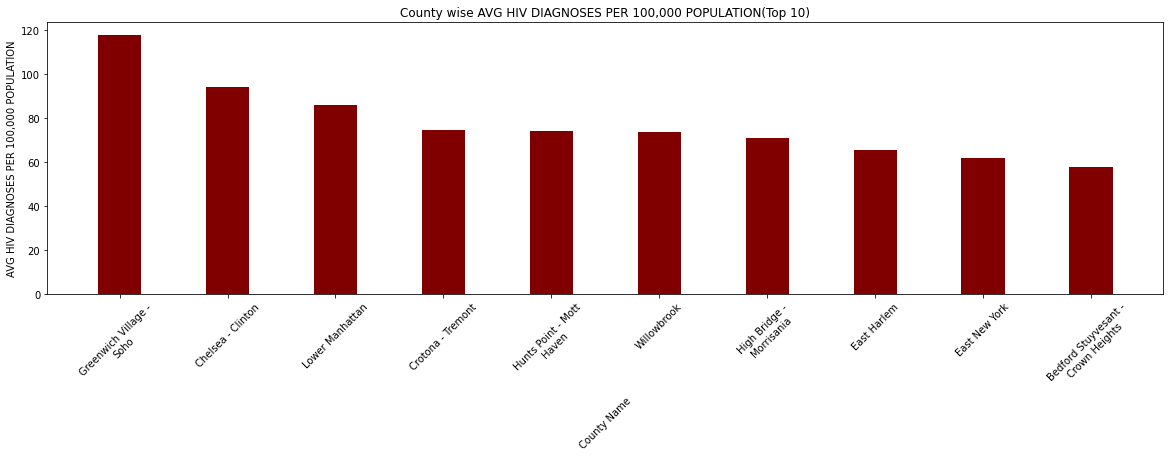

In [46]:
fig = plt.figure(figsize = (20, 5))
 
plt.bar(max_hiv_df["county"][:10], max_hiv_df['AVG HIV DIAGNOSES PER 100,000 POPULATION'][:10], color ='maroon',
        width = 0.4,)
 
plt.xlabel("County Name",rotation=45)
plt.ylabel("AVG HIV DIAGNOSES PER 100,000 POPULATION")
plt.xticks(max_hiv_df["county"][:10], max_hiv_df["county"][:10].unique(), rotation=45)
plt.title("County wise AVG HIV DIAGNOSES PER 100,000 POPULATION(Top 10)")
plt.show()

In [47]:
#Top county is Greenwhichvilage soho
HA_GS=HA_update[HA_update["Neighborhood (U.H.F)"]=="Greenwich Village -\nSoho"]
HA_GS.shape

(35, 11)

In [48]:
HA_GS["YEAR"]

3402    2016
3405    2016
3407    2016
3408    2016
3409    2016
3410    2016
3411    2016
3412    2016
3413    2016
4266    2017
4268    2017
4272    2017
4274    2017
4275    2017
4276    2017
4277    2017
5130    2018
5132    2018
5136    2018
5138    2018
5139    2018
5140    2018
5141    2018
6000    2019
6001    2019
6002    2019
6003    2019
6004    2019
6005    2019
6860    2020
6862    2020
6866    2020
6868    2020
6869    2020
6871    2020
Name: YEAR, dtype: int64

In [49]:
HA_GS

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
3402,2016,Manhattan,Greenwich Village -\nSoho,Female,All,2,5.4,0,0,2,5.4
3405,2016,Manhattan,Greenwich Village -\nSoho,Female,Latino/Hispanic,1,40.8,0,0,1,40.8
3407,2016,Manhattan,Greenwich Village -\nSoho,Female,White,1,3.9,0,0,0,0
3408,2016,Manhattan,Greenwich Village -\nSoho,Male,All,23,62,2,8.7,7,18.9
3409,2016,Manhattan,Greenwich Village -\nSoho,Male,Asian/Pacific\nIslander,3,50.6,0,0,0,0
3410,2016,Manhattan,Greenwich Village -\nSoho,Male,Black,4,330.4,1,25,2,165.2
3411,2016,Manhattan,Greenwich Village -\nSoho,Male,Latino/Hispanic,6,205.7,1,16.7,2,68.6
3412,2016,Manhattan,Greenwich Village -\nSoho,Male,Other/Unknown,1,138.6,0,0,0,0
3413,2016,Manhattan,Greenwich Village -\nSoho,Male,White,9,34.2,0,0,3,11.4
4266,2017,Manhattan,Greenwich Village -\nSoho,Female,All,1,2.7,0,0,0,0


In [50]:
HA_M=HA[HA["SEX"]=="Male"]
HA_F=HA[HA["SEX"]=="Female"]

In [51]:
HA_M.shape,HA_F.shape

((1140, 11), (740, 11))

In [52]:
HA["HIV DIAGNOSES PER 100,000 POPULATION"].astype(float).mean()

35.55459016393443

In [53]:
HA

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Brooklyn,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
2928,2016,All,All,All,All,2235,31.2,367,16.4,1390,19.4
2929,2016,All,All,All,Asian/Pacific\nIslander,145,13.8,32,22.1,52,5
2930,2016,All,All,All,Black,933,58.4,171,18.3,668,41.8
2931,2016,All,All,All,Latino/Hispanic,792,39.6,115,14.5,474,23.7
...,...,...,...,...,...,...,...,...,...,...,...
7232,2020,Staten\nIsland,Willowbrook,All,Black,2,79.9,0,0,1,39.9
7236,2020,Staten\nIsland,Willowbrook,Female,All,1,2.5,0,0,0,0
7237,2020,Staten\nIsland,Willowbrook,Female,Asian/Pacific\nIslander,1,12.4,0,0,0,0
7242,2020,Staten\nIsland,Willowbrook,Male,All,2,5.4,0,0,1,2.7


In [54]:
HA[HA["Neighborhood (U.H.F)"]=="Greenwich Village -\nSoho"]

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
3396,2016,Manhattan,Greenwich Village -\nSoho,All,All,25,33.6,2,8,9,12.1
3397,2016,Manhattan,Greenwich Village -\nSoho,All,Asian/Pacific\nIslander,3,22.6,0,0,0,0
3398,2016,Manhattan,Greenwich Village -\nSoho,All,Black,4,213.7,1,25,3,160.3
3399,2016,Manhattan,Greenwich Village -\nSoho,All,Latino/Hispanic,7,130.3,1,14.3,3,55.9
3400,2016,Manhattan,Greenwich Village -\nSoho,All,Other/Unknown,1,58.7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6862,2020,Manhattan,Greenwich Village -\nSoho,Female,Black,1,156.5,0,0,0,0
6866,2020,Manhattan,Greenwich Village -\nSoho,Male,All,13,35.5,2,15.4,8,21.9
6868,2020,Manhattan,Greenwich Village -\nSoho,Male,Black,4,335.7,1,25,2,167.9
6869,2020,Manhattan,Greenwich Village -\nSoho,Male,Latino/Hispanic,1,35.1,0,0,0,0


In [55]:
HA_new=HA[HA["SEX"]!="All"]
HA_new=HA_new[HA_new["Neighborhood (U.H.F)"]!="All"]
HA_new=HA_new[HA_new["RACE/ETHNICITY"]!="All"]
HA_new=HA_new[HA_new["Borough"]!="All"]

In [56]:
HA_new.shape

(1160, 11)

In [57]:
HA_new["Borough"].unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten\nIsland'],
      dtype=object)

In [58]:
HA_new["SEX"].unique()

array(['Male', 'Female'], dtype=object)

In [59]:
HA_new["Neighborhood (U.H.F)"].unique()

array(['Greenpoint', 'Crotona - Tremont', 'Fordham - Bronx\nPark',
       'High Bridge -\nMorrisania', 'Hunts Point - Mott\nHaven',
       'Kingsbridge -\nRiverdale', 'Northeast Bronx',
       'Pelham - Throgs\nNeck', 'Bedford Stuyvesant -\nCrown Heights',
       'Bensonhurst - Bay\nRidge', 'Borough Park', 'Canarsie - Flatlands',
       'Coney Island -\nSheepshead Bay',
       'Downtown - Heights -\nPark Slope', 'East Flatbush -\nFlatbush',
       'East New York', 'Sunset Park', 'Williamsburg -\nBushwick',
       'Central Harlem -\nMorningside Heights', 'Chelsea - Clinton',
       'East Harlem', 'Gramercy Park -\nMurray Hill',
       'Greenwich Village -\nSoho', 'Lower Manhattan',
       'Union Square -\nLower East Side', 'Upper East Side',
       'Upper West Side', 'Washington Heights -\nInwood',
       'Bayside - Little Neck', 'Flushing - Clearview', 'Fresh Meadows',
       'Jamaica', 'Long Island City -\nAstoria',
       'Ridgewood - Forest\nHills', 'Rockaway', 'Southeast Queens',
 

In [60]:
HA_new["Borough"].unique()

array(['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten\nIsland'],
      dtype=object)

In [61]:
HA_new["RACE/ETHNICITY"].unique()

array(['Black', 'Latino/Hispanic', 'White', 'Asian/Pacific\nIslander',
       'Other/Unknown'], dtype=object)

In [70]:
HA_new_brooklyn=HA_new[HA_new["Borough"]=="Brooklyn"]
HA_new_brooklyn=HA_new_brooklyn[HA_new_brooklyn["YEAR"]!=2010]
HA_new_brooklyn

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
3116,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,Female,Black,31,31.1,8,25.8,25,25.1
3117,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,Female,Latino/Hispanic,3,14.4,1,33.3,3,14.4
3121,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,Male,Asian/Pacific\nIslander,5,110.6,0,0,0,0
3122,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,Male,Black,97,129.7,22,22.7,58,77.5
3123,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,Male,Latino/Hispanic,22,131.8,3,13.6,8,47.9
...,...,...,...,...,...,...,...,...,...,...,...
6754,2020,Brooklyn,Williamsburg -\nBushwick,Female,Latino/Hispanic,2,5.3,1,50,2,5.3
6758,2020,Brooklyn,Williamsburg -\nBushwick,Male,Asian/Pacific\nIslander,2,38.7,1,50,2,38.7
6759,2020,Brooklyn,Williamsburg -\nBushwick,Male,Black,20,96.2,1,5,11,52.9
6760,2020,Brooklyn,Williamsburg -\nBushwick,Male,Latino/Hispanic,15,43.1,4,26.7,8,23


In [96]:
HA_new_Bronx=HA_new[HA_new["Borough"]=="Bronx"]
HA_new_Bronx=HA_new_Bronx[HA_new_Bronx["YEAR"]!=2010]
HA_new_Bronx

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2972,2016,Bronx,Crotona - Tremont,Female,Black,10,38.7,0,0,10,38.7
2973,2016,Bronx,Crotona - Tremont,Female,Latino/Hispanic,14,22,2,14.3,12,18.9
2975,2016,Bronx,Crotona - Tremont,Female,White,2,130.6,0,0,0,0
2978,2016,Bronx,Crotona - Tremont,Male,Black,26,115.7,7,26.9,13,57.9
2979,2016,Bronx,Crotona - Tremont,Male,Latino/Hispanic,34,64.3,7,20.6,26,49.1
...,...,...,...,...,...,...,...,...,...,...,...
6537,2020,Bronx,Pelham - Throgs\nNeck,Female,Latino/Hispanic,2,2.9,0,0,10,14.4
6541,2020,Bronx,Pelham - Throgs\nNeck,Male,Asian/Pacific\nIslander,1,10.2,0,0,0,0
6542,2020,Bronx,Pelham - Throgs\nNeck,Male,Black,19,81.4,4,21.1,8,34.3
6543,2020,Bronx,Pelham - Throgs\nNeck,Male,Latino/Hispanic,22,37.1,5,22.7,8,13.5


In [97]:
HA_new_Queens=HA_new[HA_new["Borough"]=="Queens"]
HA_new_Queens=HA_new_Queens[HA_new_Queens["YEAR"]!=2010]
HA_new_Queens

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
3529,2016,Queens,Bayside - Little Neck,Female,Asian/Pacific\nIslander,1,5.8,1,100,1,5.8
3539,2016,Queens,Bayside - Little Neck,Male,White,3,19.7,1,33.3,2,13.1
3547,2016,Queens,Flushing - Clearview,Female,Asian/Pacific\nIslander,2,3.3,2,100,2,3.3
3553,2016,Queens,Flushing - Clearview,Male,Asian/Pacific\nIslander,9,16.9,2,22.2,2,3.7
3554,2016,Queens,Flushing - Clearview,Male,Black,2,107.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7151,2020,Queens,West Queens,Female,White,1,3.4,0,0,0,0
7153,2020,Queens,West Queens,Male,Asian/Pacific\nIslander,7,14.6,3,42.9,3,6.2
7154,2020,Queens,West Queens,Male,Black,2,17.5,0,0,1,8.7
7155,2020,Queens,West Queens,Male,Latino/Hispanic,49,48.5,13,26.5,23,22.8


In [98]:
HA_new_Manhattan=HA_new[HA_new["Borough"]=="Manhattan"]
HA_new_Manhattan=HA_new_Manhattan[HA_new_Manhattan["YEAR"]!=2010]
HA_new_Manhattan

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
3332,2016,Manhattan,Central Harlem -\nMorningside Heights,Female,Black,7,16.4,1,14.3,10,23.5
3335,2016,Manhattan,Central Harlem -\nMorningside Heights,Female,White,1,6.9,0,0,0,0
3337,2016,Manhattan,Central Harlem -\nMorningside Heights,Male,Asian/Pacific\nIslander,2,48.2,0,0,1,24.1
3338,2016,Manhattan,Central Harlem -\nMorningside Heights,Male,Black,39,113.9,11,28.2,28,81.8
3339,2016,Manhattan,Central Harlem -\nMorningside Heights,Male,Latino/Hispanic,21,119.7,3,14.3,5,28.5
...,...,...,...,...,...,...,...,...,...,...,...
6953,2020,Manhattan,Washington Heights -\nInwood,Female,Latino/Hispanic,5,6.6,2,40,4,5.3
6958,2020,Manhattan,Washington Heights -\nInwood,Male,Black,16,134.4,2,12.5,6,50.4
6959,2020,Manhattan,Washington Heights -\nInwood,Male,Latino/Hispanic,24,35,3,12.5,10,14.6
6960,2020,Manhattan,Washington Heights -\nInwood,Male,Other/Unknown,2,134.9,1,50,1,67.5


In [99]:
HA_new_Staten=HA_new[HA_new["Borough"]=="Staten\nIsland"]
HA_new_Staten=HA_new_Staten[HA_new_Staten["YEAR"]!=2010]
HA_new_Staten

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
3728,2016,Staten\nIsland,Port Richmond,Female,Black,3,38.4,0,0,1,12.8
3731,2016,Staten\nIsland,Port Richmond,Female,White,1,10.8,0,0,0,0
3734,2016,Staten\nIsland,Port Richmond,Male,Black,5,76.7,1,20,3,46
3735,2016,Staten\nIsland,Port Richmond,Male,Latino/Hispanic,4,42.3,2,50,3,31.7
3737,2016,Staten\nIsland,Port Richmond,Male,White,3,34.5,1,33.3,1,11.5
...,...,...,...,...,...,...,...,...,...,...,...
7226,2020,Staten\nIsland,Stapleton - St.\nGeorge,Male,Black,6,73.6,1,16.7,2,24.5
7227,2020,Staten\nIsland,Stapleton - St.\nGeorge,Male,Latino/Hispanic,1,9.8,0,0,3,29.3
7229,2020,Staten\nIsland,Stapleton - St.\nGeorge,Male,White,2,8.3,2,100,4,16.6
7237,2020,Staten\nIsland,Willowbrook,Female,Asian/Pacific\nIslander,1,12.4,0,0,0,0


In [64]:
# AIDS DIAGNOSES PER 100,000 POPULATION

In [100]:
lst1=[]
lst2=[]
for i in HA_new_brooklyn["YEAR"].unique():
    lst2.append(HA_new_brooklyn[HA_new_brooklyn["YEAR"]==i]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
    lst1.append(i)


In [101]:
print(lst2)
df=pd.DataFrame()
df["AIDS DIAGNOSES PER 100,000 POPULATION"]=lst1
df["year"]=lst2

[18.897101449275365, 28.66216216216216, 18.7530303030303, 15.397014925373133, 16.008928571428573]


In [102]:
df

,"AIDS DIAGNOSES PER 100,000 POPULATION",year
0,2016,18.897101
1,2017,28.662162
2,2018,18.753030
3,2019,15.397015
4,2020,16.008929


In [103]:
lst1=[]
lst2=[]
for i in HA_new_Bronx["YEAR"].unique():
    lst2.append(HA_new_Bronx[HA_new_Bronx["YEAR"]==i]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
    lst1.append(i)
print(lst2)
df2=pd.DataFrame()
df2["AIDS DIAGNOSES PER 100,000 POPULATION"]=lst1
df2["year"]=lst2

[37.32142857142857, 31.053846153846152, 39.462857142857146, 39.51666666666667, 32.32285714285714]


In [104]:
lst1=[]
lst2=[]
for i in HA_new_Queens["YEAR"].unique():
    lst2.append(HA_new_Queens[HA_new_Queens["YEAR"]==i]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
    lst1.append(i)
print(lst2)
df3=pd.DataFrame()
df3["AIDS DIAGNOSES PER 100,000 POPULATION"]=lst1
df3["year"]=lst2

[16.879245283018868, 13.80952380952381, 14.696226415094339, 12.914285714285715, 13.998076923076924]


In [105]:
lst1=[]
lst2=[]
for i in HA_new_Manhattan["YEAR"].unique():
    lst2.append(HA_new_Manhattan[HA_new_Manhattan["YEAR"]==i]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
    lst1.append(i)
print(lst2)
df4=pd.DataFrame()
df4["AIDS DIAGNOSES PER 100,000 POPULATION"]=lst1
df4["year"]=lst2

[35.65166666666667, 28.901666666666664, 31.544262295081968, 33.73584905660377, 35.17058823529412]


In [106]:
lst1=[]
lst2=[]
for i in HA_new_Staten["YEAR"].unique():
    lst2.append(HA_new_Staten[HA_new_Staten["YEAR"]==i]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
    lst1.append(i)
print(lst2)
df5=pd.DataFrame()
df5["AIDS DIAGNOSES PER 100,000 POPULATION"]=lst1
df5["year"]=lst2

[24.031818181818185, 25.55333333333333, 14.833333333333334, 6.81875, 15.36923076923077]


In [107]:
# lst1=[]
# lst2=[]
# for i in HA_new_brooklyn["YEAR"].unique():
#     lst2.append(HA_new_brooklyn[HA_new_brooklyn["YEAR"]==i]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
#     lst1.append(i)
# print(lst2)
# df6=pd.DataFrame()
# df6["AIDS DIAGNOSES PER 100,000 POPULATION"]=lst1
# df6["year"]=lst2

In [112]:
df5

,"AIDS DIAGNOSES PER 100,000 POPULATION",year
0,2016,24.031818
1,2017,25.553333
2,2018,14.833333
3,2019,6.818750
4,2020,15.369231


In [129]:
df["year"]=df["year"].astype(int)
df2["year"]=df2["year"].astype(int)
df3["year"]=df3["year"].astype(int)
df4["year"]=df4["year"].astype(int)
df5["year"]=df5["year"].astype(int)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   AIDS DIAGNOSES PER 100,000 POPULATION  5 non-null      int64
 1   year                                   5 non-null      int32
dtypes: int32(1), int64(1)
memory usage: 188.0 bytes


<ipython-input-131-e1ed0cbdd6f4>:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(max_hiv_df["county"][:10], max_hiv_df['AVG HIV DIAGNOSES PER 100,000 POPULATION'][:10], color ='maroon',
<ipython-input-131-e1ed0cbdd6f4>:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.xticks(max_hiv_df["county"][:10], max_hiv_df["county"][:10].unique(), rotation=45)


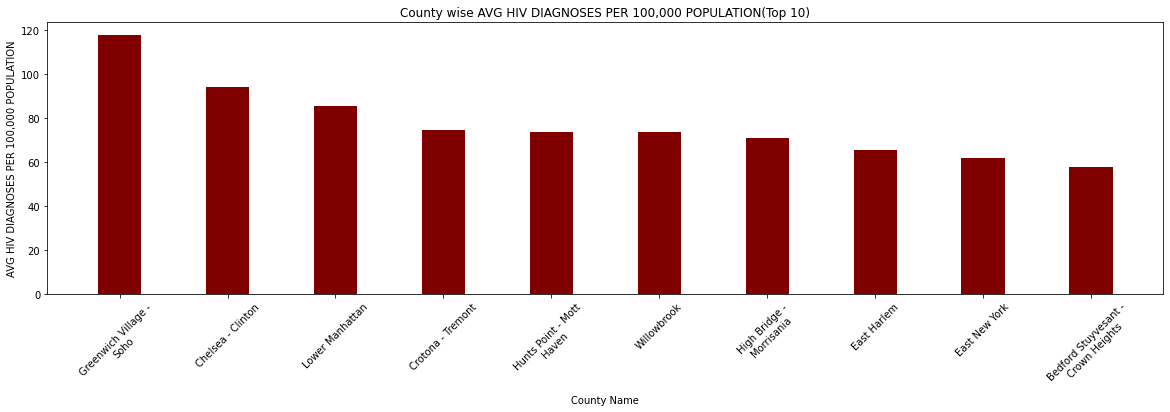

In [131]:
fig = plt.figure(figsize = (20, 5))
 
plt.bar(max_hiv_df["county"][:10], max_hiv_df['AVG HIV DIAGNOSES PER 100,000 POPULATION'][:10], color ='maroon',
        width = 0.4,)
 
plt.xlabel("County Name")
plt.ylabel("AVG HIV DIAGNOSES PER 100,000 POPULATION")
plt.xticks(max_hiv_df["county"][:10], max_hiv_df["county"][:10].unique(), rotation=45)
plt.title("County wise AVG HIV DIAGNOSES PER 100,000 POPULATION(Top 10)")
plt.show()

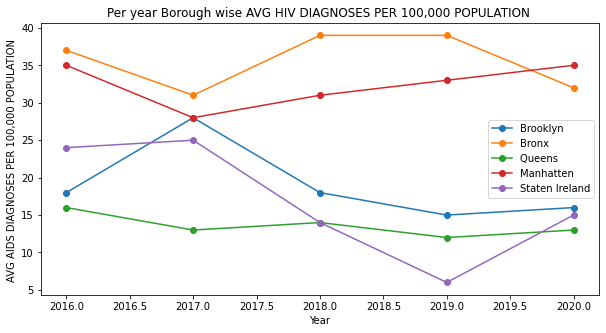

In [141]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df["AIDS DIAGNOSES PER 100,000 POPULATION"], df["year"].astype(int),label = "Brooklyn",marker='o')
plt.plot( df2["AIDS DIAGNOSES PER 100,000 POPULATION"],df2["year"].astype(int), label = "Bronx ",marker='o')
plt.plot( df3["AIDS DIAGNOSES PER 100,000 POPULATION"],df3["year"].astype(int), label = "Queens ",marker='o')
plt.plot(df4["AIDS DIAGNOSES PER 100,000 POPULATION"],df4["year"].astype(int),  label = "Manhatten ",marker='o')
plt.plot( df5["AIDS DIAGNOSES PER 100,000 POPULATION"],df5["year"].astype(int), label = "Staten Ireland",marker='o')

plt.xlabel("Year")
plt.ylabel("AVG AIDS DIAGNOSES PER 100,000 POPULATION ")
plt.title("Per year Borough wise AVG HIV DIAGNOSES PER 100,000 POPULATION ")
plt.legend()
plt.show()

In [142]:
HA_new.shape

(1160, 11)

In [144]:
HA_new["RACE/ETHNICITY"].value_counts()

Latino/Hispanic            343
Black                      340
White                      245
Asian/Pacific\nIslander    162
Other/Unknown               70
Name: RACE/ETHNICITY, dtype: int64

In [145]:
HA_new["SEX"].value_counts()

Male      757
Female    403
Name: SEX, dtype: int64

In [148]:
labels=list(HA_new["RACE/ETHNICITY"].unique())
labels

['Black',
 'Latino/Hispanic',
 'White',
 'Asian/Pacific\nIslander',
 'Other/Unknown']

In [162]:
HA_new[(HA_new["RACE/ETHNICITY"]==i) & (HA_new["SEX"]=="Female" )]

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2972,2016,Bronx,Crotona - Tremont,Female,Black,10,38.7,0,0,10,38.7
2990,2016,Bronx,Fordham - Bronx\nPark,Female,Black,24,91.7,5,20.8,11,42
3008,2016,Bronx,High Bridge -\nMorrisania,Female,Black,17,55,4,23.5,17,55
3026,2016,Bronx,Hunts Point - Mott\nHaven,Female,Black,2,12.1,1,50,5,30.2
3044,2016,Bronx,Kingsbridge -\nRiverdale,Female,Black,2,36.2,1,50,1,18.1
...,...,...,...,...,...,...,...,...,...,...,...
7096,2020,Queens,Rockaway,Female,Black,3,13.8,0,0,1,4.6
7114,2020,Queens,Southeast Queens,Female,Black,5,9.2,0,0,0,0
7132,2020,Queens,Southwest Queens,Female,Black,4,32.4,1,25,1,8.1
7148,2020,Queens,West Queens,Female,Black,1,10.6,0,0,3,31.8


In [160]:
men_list=[]
for i in labels:
    print(i)
    men_list.append(HA_new[(HA_new["RACE/ETHNICITY"]==i) & (HA_new["SEX"]=="Male" )]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
#     lst1.append(i)
men_list

Black
Latino/Hispanic
White
Asian/Pacific
Islander
Other/Unknown


[57.431958762886595,
 29.345544554455444,
 13.286516853932584,
 13.685714285714285,
 31.49122807017544]

In [164]:
female_list=[]
for i in labels:
    print(i)
    female_list.append(HA_new[(HA_new["RACE/ETHNICITY"]==i) & (HA_new["SEX"]=="Female" )]["AIDS DIAGNOSES PER 100,000 POPULATION"].astype(float).mean())
#     lst1.append(i)
female_list

Black
Latino/Hispanic
White
Asian/Pacific
Islander
Other/Unknown


[22.172602739726027,
 8.609929078014185,
 6.51044776119403,
 2.1333333333333333,
 33.392307692307696]

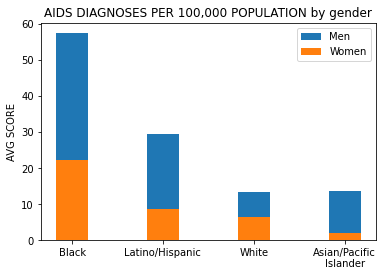

In [173]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ax.bar(labels[:4], men_list[:4], width, label='Men')
ax.bar(labels[:4], female_list[:4], width,
       label='Women')

ax.set_ylabel('AVG SCORE')
ax.set_title('AIDS DIAGNOSES PER 100,000 POPULATION by gender')
ax.legend()

plt.show()